In [22]:
import numpy as np
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans, KShape, silhouette_score
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import import_ipynb
import sklearn
import tslearn
from concurrent.futures import ProcessPoolExecutor
import os
import pickle
import time
import re
from sklearn.metrics import silhouette_samples
from tslearn.metrics import cdist_soft_dtw_normalized, cdist_dtw
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering

In [23]:
np.set_printoptions(suppress=True, precision=5)

In [24]:
KatalogPickli="Pickle"
outDir="../src/OutDir"

In [25]:
with open(os.path.join(KatalogPickli, "Ecola-zakodowane.pickle"), "rb") as plik:
    zakodowaneSzer=pickle.load(plik)
with open(os.path.join(outDir, "odl-1627838162.908691-gamma-4.0.pickle"), "rb") as plik:
    odl=pickle.load(plik)
with open(os.path.join(outDir, "odl-Ecola-wygladzone-ustandaryzowane.pickle1627817822.0182662dtw.pickle"), "rb") as plik:
    odlDtw=pickle.load(plik)

In [28]:
model=KMeans(6)
etykiety=model.fit_predict(zakodowaneSzer)
ocenaSoft=silhouette_score(odl, etykiety, metric="precomputed")
ocenaDtw=silhouette_score(odlDtw, etykiety, metric="precomputed")
print(f"SoftDtw: {ocenaSoft} Dtw: {ocenaDtw}")
print(f"W zakodowanej przestrzeni: {silhouette_score(zakodowaneSzer,etykiety, metric='euclidean')}")

SoftDtw: -0.01672026360650745 Dtw: -0.030305032063434448
W zakodowanej przestrzeni: 0.08702449834657616


### Analizy wartości

In [16]:
np.array([1]).ravel()

array([1])

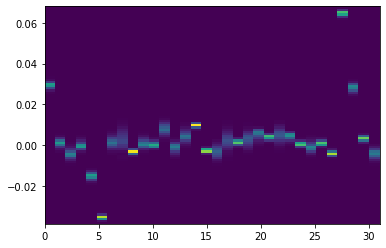

In [19]:
plt.hist2d(np.arange(32).reshape(1,-1).repeat(zakodowaneSzer.shape[0], axis=0).ravel(),
          zakodowaneSzer.ravel(), bins=(32,100))
plt.show()

### Ustandaryzowane kodowanie 

In [29]:
zakodowaneSzer=(zakodowaneSzer-zakodowaneSzer.mean(axis=0, keepdims=True))/zakodowaneSzer.std(axis=0, keepdims=True)

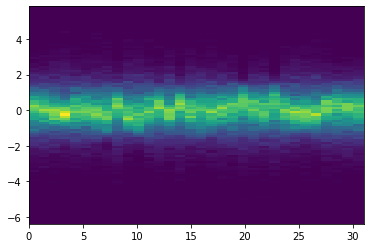

In [30]:
plt.hist2d(np.arange(32).reshape(1,-1).repeat(zakodowaneSzer.shape[0], axis=0).ravel(),
          zakodowaneSzer.ravel(), bins=(32,100))
plt.show()

In [31]:
model=KMeans(6)
etykiety=model.fit_predict(zakodowaneSzer)
ocenaSoft=silhouette_score(odl, etykiety, metric="precomputed")
ocenaDtw=silhouette_score(odlDtw, etykiety, metric="precomputed")
print(f"SoftDtw: {ocenaSoft} Dtw: {ocenaDtw}")
print(f"W zakodowanej przestrzeni: {silhouette_score(zakodowaneSzer,etykiety, metric='euclidean')}")

SoftDtw: -0.04340247747089516 Dtw: -0.051553629504219
W zakodowanej przestrzeni: 0.08675148723071881
